<a href="https://colab.research.google.com/github/DevMed22/Revive_My_Memory/blob/model/models/Analyze_MetaData_FirstSprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV data ADNI Website

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### prepare the data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
emci= '/content/drive/MyDrive/ADNI_data/EMCI csv files/idaSearch_2_11_2023.csv'
lmci = '/content/drive/MyDrive/ADNI_data/LMCI csv files/idaSearch_2_11_2023.csv'
ad = '/content/drive/MyDrive/ADNI_data/AD/idaSearch_2_11_2023.csv'
cn = '/content/drive/MyDrive/ADNI_data/CN/idaSearch_2_11_2023.csv'

In [4]:
df = pd.concat(map(pd.read_csv,[emci,lmci,ad,cn]),ignore_index=True)
df.head()

,Subject ID,Phase,Sex,Weight,Research Group,APOE A1,APOE A2,Visit,Study Date,Archive Date,...,Global CDR,NPI-Q Total Score,MMSE Total Score,GDSCALE Total Score,FAQ Total Score,Modality,Description,Imaging Protocol,Image ID,Project
0,002_S_2010,ADNI GO,F,111.5,EMCI,3.0,4.0,ADNI1/GO Month 6,1/22/2011,1/22/2011,...,0.0,0.0,29.0,1.0,0.0,MRI,Axial T2-Star,Acquisition Plane=AXIAL;Slice Thickness=4.0;Ma...,213878,NaN
1,002_S_2010,ADNI GO,F,111.5,EMCI,3.0,4.0,ADNI1/GO Month 6,1/22/2011,1/22/2011,...,0.0,0.0,29.0,1.0,0.0,MRI,SURVEY,Acquisition Plane=SAGITTAL;Slice Thickness=10....,213879,NaN
2,002_S_2010,ADNI GO,F,111.5,EMCI,3.0,4.0,ADNI1/GO Month 6,1/22/2011,1/22/2011,...,0.0,0.0,29.0,1.0,0.0,MRI,SURVEY,Acquisition Plane=CORONAL;Slice Thickness=10.0...,213882,NaN
3,002_S_2010,ADNI GO,F,111.5,EMCI,3.0,4.0,ADNI1/GO Month 6,1/22/2011,1/22/2011,...,0.0,0.0,29.0,1.0,0.0,MRI,SURVEY,Acquisition Plane=AXIAL;Slice Thickness=10.0;M...,213883,NaN
4,002_S_2010,ADNI GO,F,111.5,EMCI,3.0,4.0,ADNI1/GO Month 6,1/22/2011,1/22/2011,...,0.0,0.0,29.0,1.0,0.0,MRI,MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.2...,213880,NaN


### Data preprocessing

In [5]:
len(df)

39910

In [7]:
df.columns

Index(['Subject ID', 'Phase', 'Sex', 'Weight', 'Research Group', 'APOE A1',
       'APOE A2', 'Visit', 'Study Date', 'Archive Date', 'Age', 'Global CDR',
       'NPI-Q Total Score', 'MMSE Total Score', 'GDSCALE Total Score',
       'FAQ Total Score', 'Modality', 'Description', 'Imaging Protocol',
       'Image ID', 'Project'],
      dtype='object')

We don't need some features so I'll drop their columns

In [20]:
df_used = df.drop(['APOE A1','APOE A2','Global CDR',
       'NPI-Q Total Score', 'MMSE Total Score', 'GDSCALE Total Score',
       'FAQ Total Score','Imaging Protocol','Project'],axis=1)
df_used.head()

,Subject ID,Phase,Sex,Weight,Research Group,Visit,Study Date,Archive Date,Age,Modality,Description,Image ID
0,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,Axial T2-Star,213878
1,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213879
2,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213882
3,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213883
4,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,MPRAGE,213880


In [38]:
df_used.dtypes

Subject ID         object
Phase              object
Sex                object
Weight            float64
Research Group     object
Visit              object
Study Date         object
Archive Date       object
Age               float64
Modality           object
Description        object
Image ID            int64
dtype: object

In [40]:
df_used.isnull().sum()

Subject ID        0
Phase             0
Sex               0
Weight            0
Research Group    0
Visit             0
Study Date        0
Archive Date      0
Age               0
Modality          0
Description       0
Image ID          0
dtype: int64

Good :) 

there are no null cellls

In [44]:
df_used.describe(include='object')

,Subject ID,Phase,Sex,Research Group,Visit,Study Date,Archive Date,Modality,Description
count,39910,39910,39910,39910,39910,39910,39910,39910,39910
unique,942,3,3,4,19,1990,1955,1,376
top,127_S_0260,ADNI 2,M,EMCI,ADNI1/GO Month 6,10/15/2012,5/07/2015,MRI,localizer
freq,108,19209,21105,14680,4871,111,144,39910,4047


In [22]:
df_counts=df_used.drop(['Subject ID','Weight','Study Date','Archive Date','Age','Modality','Image ID'],axis=1)

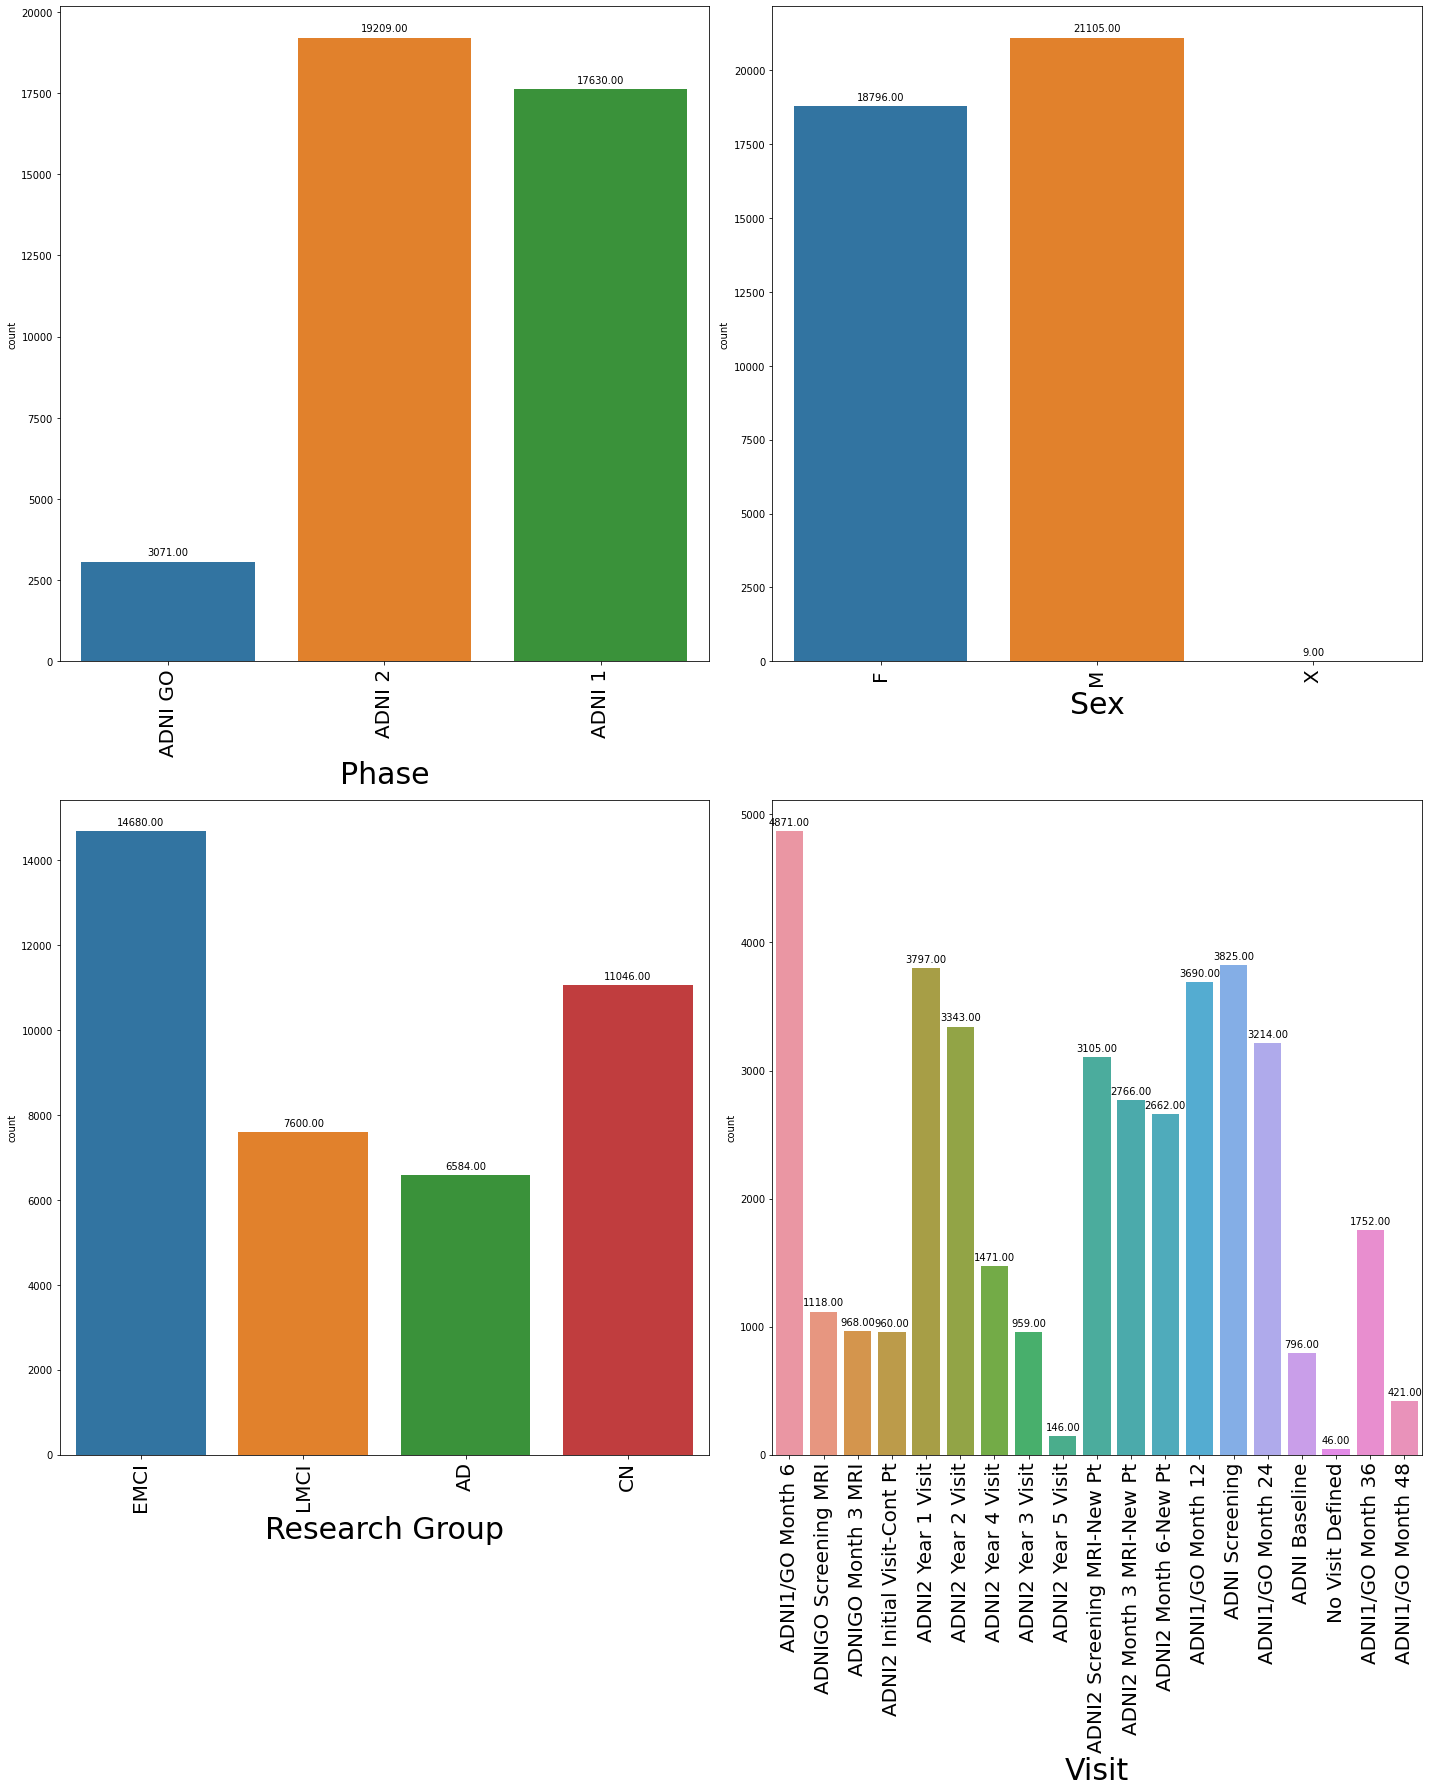

In [209]:
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(20, 25)) 
for variable, subplot in zip(df_counts.columns,ax.flatten()):
    z = sns.countplot(x = df_counts[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 30)
    z.set_xticklabels(z.get_xticklabels(),rotation=90,fontsize=20)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

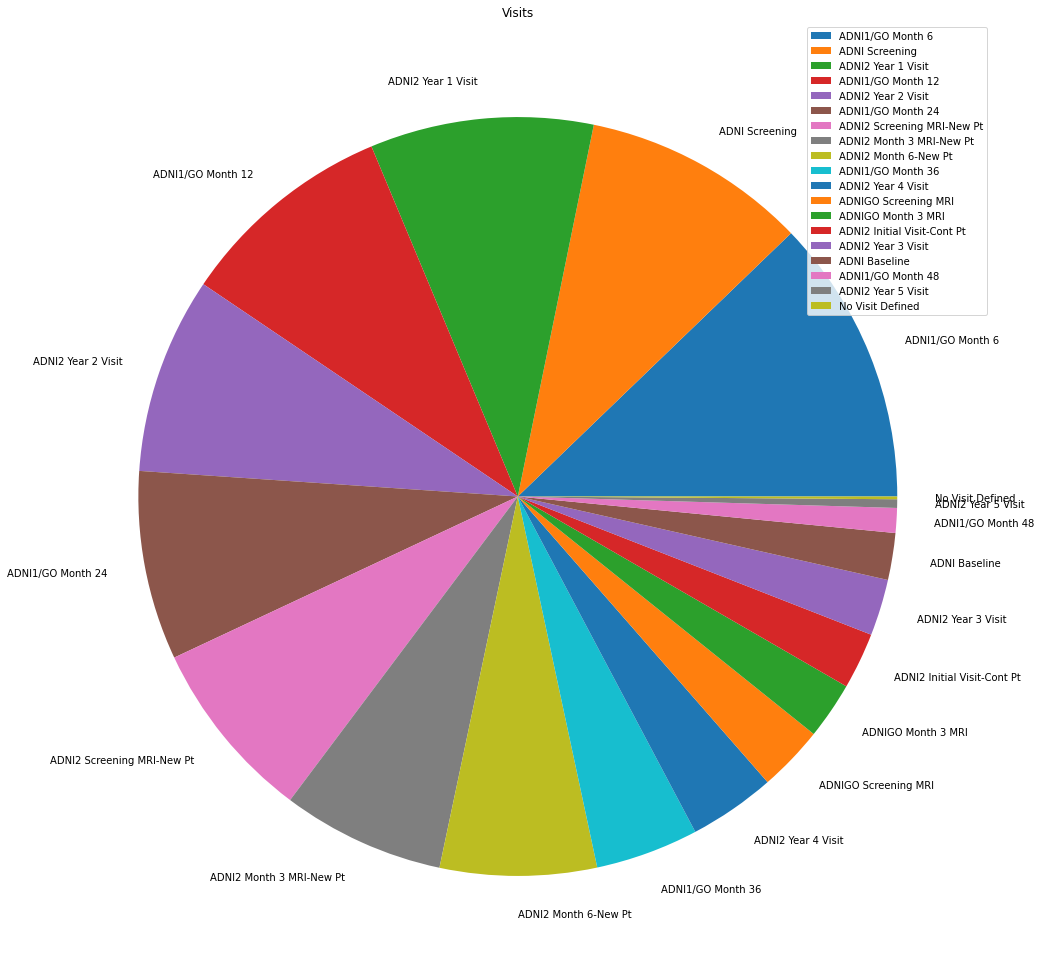

In [175]:
fig=plt.figure(figsize=(17,50))
ax=df_counts['Visit'].value_counts().plot(kind='pie',title='Visits')
ax.yaxis.set_visible(False)
plt.ylabel("")
plt.legend()


In [144]:
df_counts['Description'].value_counts()

localizer                5495
MPRAGE                   2869
3 Plane Localizer        2844
3-plane localizer        2333
Axial T2-FLAIR           1789
                         ... 
REPEAT MP-RAGE              1
MPRAGE_REPE                 1
Axial T2-Star 220 FOV       1
Axial T2-FLAIR SENSE        1
AXIAL PD TSE                1
Name: Description, Length: 375, dtype: int64

There are two descriptions called localizer

In [78]:
df_used['Description']= df_used['Description'].replace('Localizer','localizer')
df_counts['Description']= df_counts['Description'].replace('Localizer','localizer')

In [82]:
data=df_counts['Description'].value_counts()[:49]
px.bar(data,color=data.keys(),title='Most Descriptions appeard on the data')


**Let's have a look of study dates over years**

In [101]:
df_used['Study Date Years'] = pd.DatetimeIndex(df_used['Study Date']).year
df_used.head()

,Study Date Years,Study Date Year,Subject ID,Phase,Sex,Weight,Research Group,Visit,Study Date,Archive Date,Age,Modality,Description,Image ID
0,2011,NaN,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,Axial T2-Star,213878
1,2011,NaN,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213879
2,2011,NaN,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213882
3,2011,NaN,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,SURVEY,213883
4,2011,NaN,002_S_2010,ADNI GO,F,111.5,EMCI,ADNI1/GO Month 6,1/22/2011,1/22/2011,63.6,MRI,MPRAGE,213880


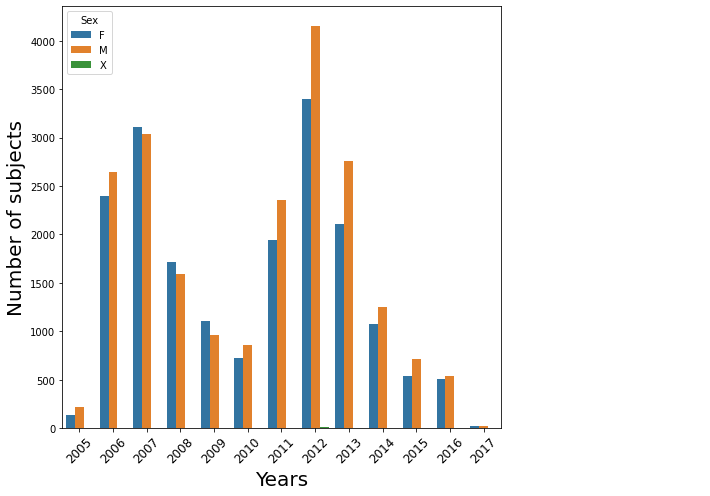

In [115]:
fig=plt.figure(figsize=(11,7))
z = sns.countplot(x = df_used['Study Date Years'],hue=df_used['Sex']) 
z.set_xlabel('Years', fontsize = 20)
z.set_ylabel('Number of subjects', fontsize = 20)
z.set_xticklabels(z.get_xticklabels(),rotation=45,fontsize=12)
z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
        xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

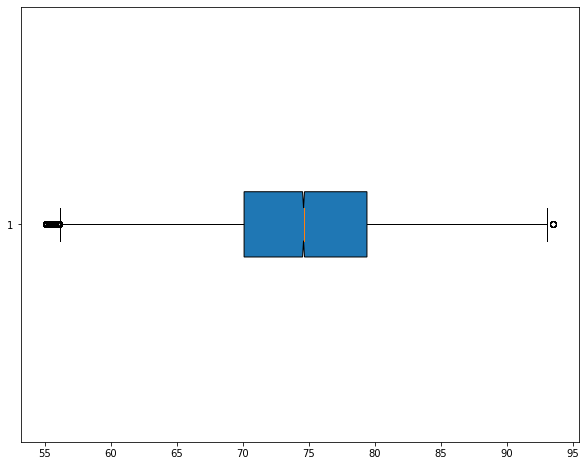

In [207]:
plt.figure(figsize=(10, 8))
plt.boxplot(df_used['Age'],notch=True,vert=False,patch_artist=True)
plt.show()

In [205]:
# plt.boxplot(df_used['Age'])
px.box(df_used,y='Age',title='Age Average for Male and Females',color='Sex')

## XML data attached with MRI data